# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_columns",300)


## 1. Data Cleaning

In [2]:
df = pd.read_csv('classification_lab_data.csv')

In [3]:
convert = ['LIMIT_BAL','BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',]

In [4]:
for col in convert:
    df[col.lower()+"_$"] = df[col]*0.032
    df.drop(col,axis = 1, inplace = True)

In [5]:
df.rename(columns = {"default payment next month":"default"}, inplace = True)

In [6]:
# maybe change (PAY) -1 , -2 to 0 because all pyments are on time
# change (PAY) col to month

In [7]:
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$
0,1,2,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776
1,1,2,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000
2,1,1,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400
3,2,2,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200
4,1,1,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056


In [8]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'limit_bal_$', 'bill_amt1_$',
       'bill_amt2_$', 'bill_amt3_$', 'bill_amt4_$', 'bill_amt5_$',
       'bill_amt6_$', 'pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$',
       'pay_amt5_$', 'pay_amt6_$'],
      dtype='object')

In [9]:
y = df.default

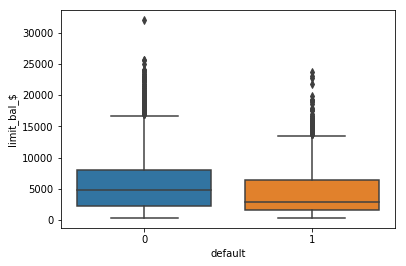

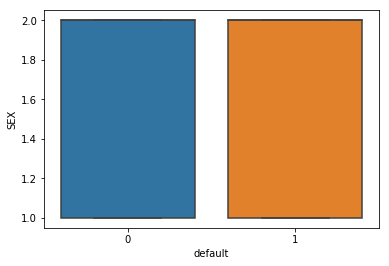

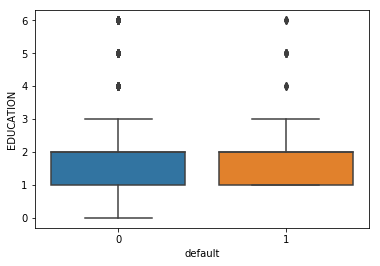

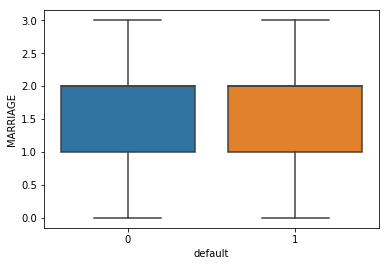

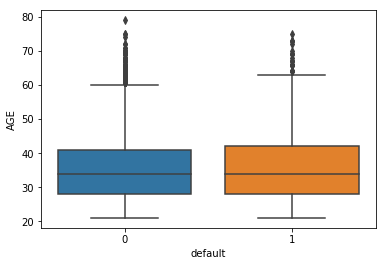

In [10]:
plots = ['limit_bal_$', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
for col in plots:
    fig = plt.figure
    sns.boxplot(x="default", y=col, data=df)
    plt.show()

In [ ]:
sns.scatterplot(df['PAY_0'],y, y_jitter = True ,x_jitter = True)

In [ ]:
sns.lmplot(x='PAY_0', y='default', data=df, ci=None, logistic=True, x_jitter=0.1, y_jitter=0.05)
sns.set({"alpha":0.3})

In [ ]:
df.info()

In [ ]:
df.head(10)

## 2. EDA

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model